In [33]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
file_path = 'weather.csv'  # Update with the actual file path
df = pd.read_csv(file_path)

# Print the head of the DataFrame
print("Head of the DataFrame:")
print(df.head())

# Check for missing values
print("\nMissing values in the DataFrame:")
print(df.isnull().sum())

Head of the DataFrame:
            Document ID        date   time         name country  latitude  \
0  007qXaWIjYRe7xaYcQEP  2023-12-01  17:11      markham  canada     43.84   
1  00BTzTNZNIpVa4Um1qXy  2023-11-27  03:30  stouffville  canada     44.00   
2  00BnLiak1g1kQDMKDozw  2023-12-02  07:18       oshawa  canada     43.93   
3  00FsVuwH13M1jj3RoPpz  2023-12-01  20:56    tottenham  canada     44.02   
4  00GYqdhEDqyeJZq9apnl  2023-11-01  07:42       whitby  canada     43.87   

   longitude  temperature_c  temperature_f     condition  ...  uv_index  \
0     -79.34            2.0           35.6     lightrain  ...       1.0   
1     -79.23            3.0           37.4      overcast  ...       1.0   
2     -78.84            2.0           35.6     lightrain  ...       1.0   
3     -79.82           -0.7           30.7         clear  ...       1.0   
4     -78.97           -1.0           30.2  partlycloudy  ...       1.0   

   cloud_cover    o3     co   no2  so2  pm2_5  pm10  gb_defra_i

In [34]:
df.shape

(37841, 28)

In [35]:
df.dtypes

Document ID          object
date                 object
time                 object
name                 object
country              object
latitude            float64
longitude           float64
temperature_c       float64
temperature_f       float64
condition            object
wind_speed_kph      float64
wind_degree           int64
wind_direction       object
gust_speed_kph      float64
pressure_mb         float64
precipitation_mm    float64
humidity              int64
visibility_km       float64
uv_index            float64
cloud_cover           int64
o3                  float64
co                  float64
no2                 float64
so2                 float64
pm2_5               float64
pm10                float64
gb_defra_index      float64
us_epa_index        float64
dtype: object

In [36]:
df = df.dropna()
df.shape

(37804, 28)

In [37]:
df[['date', 'time']].head()

,date,time
0,2023-12-01,17:11
1,2023-11-27,03:30
2,2023-12-02,07:18
3,2023-12-01,20:56
4,2023-11-01,07:42


In [38]:
# Convert 'date' and 'time' to datetime objects
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df[['date','time','datetime']].head()

,date,time,datetime
0,2023-12-01,17:11,2023-12-01 17:11:00
1,2023-11-27,03:30,2023-11-27 03:30:00
2,2023-12-02,07:18,2023-12-02 07:18:00
3,2023-12-01,20:56,2023-12-01 20:56:00
4,2023-11-01,07:42,2023-11-01 07:42:00


In [39]:
#df = df.drop(['date', 'time'], axis=1)
print(df.dtypes)

Document ID                 object
date                        object
time                        object
name                        object
country                     object
latitude                   float64
longitude                  float64
temperature_c              float64
temperature_f              float64
condition                   object
wind_speed_kph             float64
wind_degree                  int64
wind_direction              object
gust_speed_kph             float64
pressure_mb                float64
precipitation_mm           float64
humidity                     int64
visibility_km              float64
uv_index                   float64
cloud_cover                  int64
o3                         float64
co                         float64
no2                        float64
so2                        float64
pm2_5                      float64
pm10                       float64
gb_defra_index             float64
us_epa_index               float64
datetime            

In [40]:

df = df.drop(columns=['Document ID'])

In [41]:
# Convert 'longitude' and 'latitude' to float64
df['longitude'] = df['longitude'].astype('float64')
df['latitude'] = df['latitude'].astype('float64')
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)

In [42]:
df_encoded.shape

(37804, 1482)

In [43]:
# Create lag features for pm2_5 and pm10
df['pm2_5_lag1'] = df['pm2_5'].shift(1)
df['pm10_lag1'] = df['pm10'].shift(1)


In [44]:
data = df[['datetime', 'pm2_5', 'pm10', 'o3', 'co', 'no2', 'so2', 'latitude', 'longitude', 'gb_defra_index', 'us_epa_index']]
data.head()

,datetime,pm2_5,pm10,o3,co,no2,so2,latitude,longitude,gb_defra_index,us_epa_index
0,2023-12-01 17:11:00,9.8,12.7,31.1,387.2,18.9,2.4,43.84,-79.34,1.0,1.0
1,2023-11-27 03:30:00,16.3,18.1,9.0,467.3,60.3,8.1,44.00,-79.23,2.0,2.0
2,2023-12-02 07:18:00,14.9,15.1,23.6,400.5,12.5,0.7,43.93,-78.84,2.0,1.0
3,2023-12-01 20:56:00,3.4,4.0,40.4,333.8,9.6,0.6,44.02,-79.82,1.0,1.0
4,2023-11-01 07:42:00,0.5,1.1,61.5,257.0,2.4,0.8,43.87,-78.97,1.0,1.0


In [45]:
# Create lag features for all air quality metrics using .loc
data.loc[:, 'pm2_5_lag1'] = data['pm2_5'].shift(1)
data.loc[:, 'pm10_lag1'] = data['pm10'].shift(1)
data.loc[:, 'o3_lag1'] = data['o3'].shift(1)
data.loc[:, 'co_lag1'] = data['co'].shift(1)
data.loc[:, 'no2_lag1'] = data['no2'].shift(1)
data.loc[:, 'so2_lag1'] = data['so2'].shift(1)
data.loc[:, 'gb_defra_index_lag1'] = data['gb_defra_index'].shift(1)
data.loc[:, 'us_epa_index_lag1'] = data['us_epa_index'].shift(1)

C:\Users\jonbr\AppData\Local\Temp\ipykernel_8268\2694246164.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'pm2_5_lag1'] = data['pm2_5'].shift(1)
C:\Users\jonbr\AppData\Local\Temp\ipykernel_8268\2694246164.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'pm10_lag1'] = data['pm10'].shift(1)
C:\Users\jonbr\AppData\Local\Temp\ipykernel_8268\2694246164.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [46]:
# Sort the DataFrame by 'datetime' if it's not already sorted
data = data.sort_values(by='datetime')

# Split into features (X) and target variables (y)
X = data[['pm2_5_lag1', 'pm10_lag1', 'o3_lag1', 'co_lag1', 'no2_lag1', 'so2_lag1', 'latitude', 'longitude', 'gb_defra_index_lag1', 'us_epa_index_lag1']]
y_pm2_5 = data['pm2_5']
y_pm10 = data['pm10']

# Split into train and test sets
X_train, X_test, y_pm2_5_train, y_pm2_5_test, y_pm10_train, y_pm10_test = train_test_split(
    X, y_pm2_5, y_pm10, test_size=0.2, random_state=42
)

# Check the shapes of the sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_pm2_5_train shape:", y_pm2_5_train.shape)
print("y_pm2_5_test shape:", y_pm2_5_test.shape)
print("y_pm10_train shape:", y_pm10_train.shape)
print("y_pm10_test shape:", y_pm10_test.shape)

X_train shape: (30243, 10)
X_test shape: (7561, 10)
y_pm2_5_train shape: (30243,)
y_pm2_5_test shape: (7561,)
y_pm10_train shape: (30243,)
y_pm10_test shape: (7561,)


Mean Squared Error for pm2_5: 36.73712528344943
Mean Squared Error for pm10: 60.40458167487773


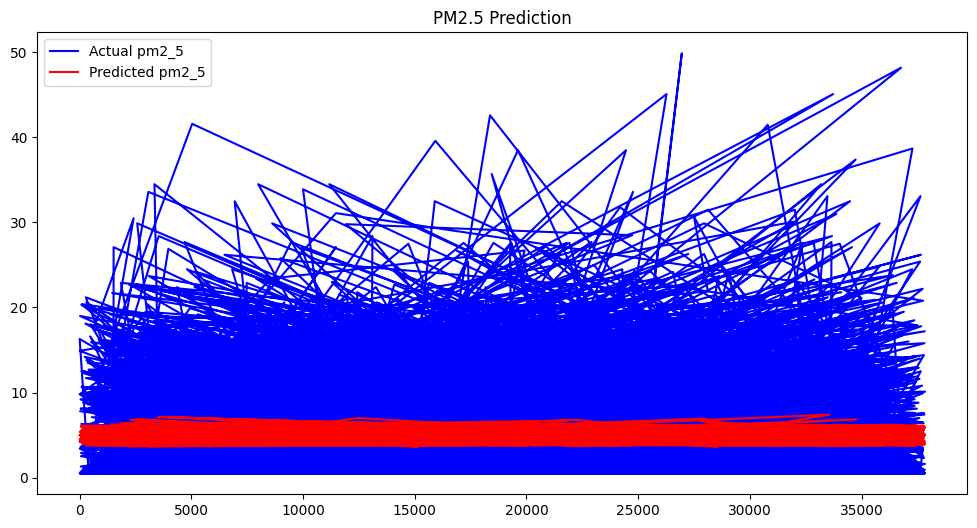

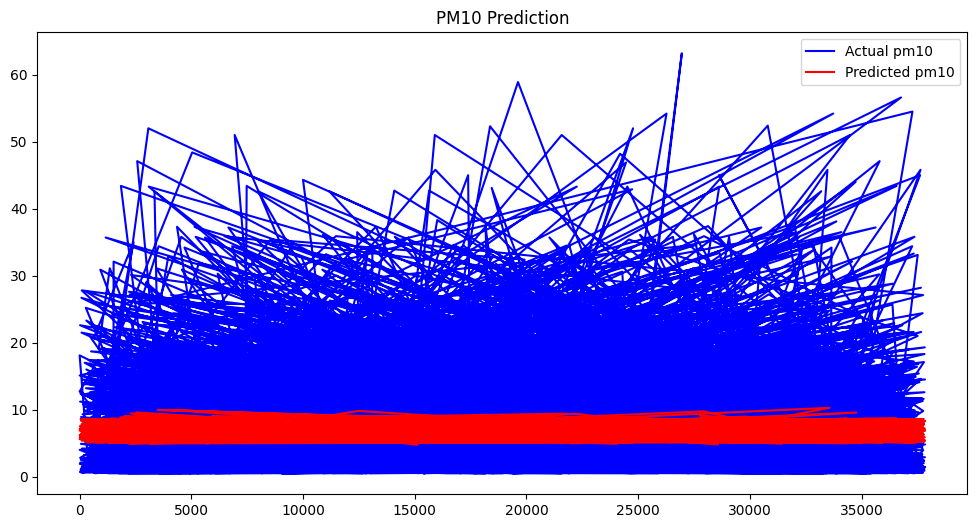

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create linear regression models
model_pm2_5 = LinearRegression()
model_pm10 = LinearRegression()

# Train the models
model_pm2_5.fit(X_train_imputed, y_pm2_5_train)
model_pm10.fit(X_train_imputed, y_pm10_train)

# Make predictions on the test set
pred_pm2_5 = model_pm2_5.predict(X_test_imputed)
pred_pm10 = model_pm10.predict(X_test_imputed)

# Evaluate the models
mse_pm2_5 = mean_squared_error(y_pm2_5_test, pred_pm2_5)
mse_pm10 = mean_squared_error(y_pm10_test, pred_pm10)

print(f'Mean Squared Error for pm2_5: {mse_pm2_5}')
print(f'Mean Squared Error for pm10: {mse_pm10}')

# Plot predictions vs. actual values
plt.figure(figsize=(12, 6))
plt.plot(y_pm2_5_test.index, y_pm2_5_test, label='Actual pm2_5', color='blue')
plt.plot(y_pm2_5_test.index, pred_pm2_5, label='Predicted pm2_5', color='red')
plt.title('PM2.5 Prediction')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(y_pm10_test.index, y_pm10_test, label='Actual pm10', color='blue')
plt.plot(y_pm10_test.index, pred_pm10, label='Predicted pm10', color='red')
plt.title('PM10 Prediction')
plt.legend()
plt.show()
